<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.531736,50.451860,0.000323,139.983919,139.983538,0.000381
1,0.0,1.0,71.172519,63.835453,-0.000650,145.007323,145.007941,-0.000618
2,0.0,2.0,44.116550,26.568400,0.003366,80.688316,80.684924,0.003392
3,0.0,3.0,52.311510,27.848716,-0.002409,90.157816,90.160188,-0.002372
4,0.0,4.0,32.215890,48.623407,-0.000348,90.838950,90.839311,-0.000361
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.962656,77.520813,-0.000139,161.483330,161.483386,-0.000057
249996,999.0,246.0,55.165347,34.094311,0.000433,99.260091,99.259698,0.000393
249997,999.0,247.0,70.476081,23.681075,-0.002165,104.154990,104.157063,-0.002073
249998,999.0,248.0,74.673527,47.423931,-0.000490,132.096969,132.097348,-0.000380


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.531736  50.451860  0.000323  139.983919  139.983538  0.000381
      1.0    71.172519  63.835453 -0.000650  145.007323  145.007941 -0.000618
      2.0    44.116550  26.568400  0.003366   80.688316   80.684924  0.003392
      3.0    52.311510  27.848716 -0.002409   90.157816   90.160188 -0.002372
      4.0    32.215890  48.623407 -0.000348   90.838950   90.839311 -0.000361
...                ...        ...       ...         ...         ...       ...
999.0 245.0  73.962656  77.520813 -0.000139  161.483330  161.483386 -0.000057
      246.0  55.165347  34.094311  0.000433   99.260091   99.259698  0.000393
      247.0  70.476081  23.681075 -0.002165  104.154990  104.157063 -0.002073
      248.0  74.673527  47.423931 -0.000490  132.096969  132.097348 -0.000380
      249.0  34.987869  43.008044  0.001540   87.997453   87.996123  0.001329

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.531736  50.451860  0.000323  139.983919  139.983538  0.000381
      1.0    71.172519  63.835453 -0.000650  145.007323  145.007941 -0.000618
      2.0    44.116550  26.568400  0.003366   80.688316   80.684924  0.003392
      3.0    52.311510  27.848716 -0.002409   90.157816   90.160188 -0.002372
      4.0    32.215890  48.623407 -0.000348   90.838950   90.839311 -0.000361
...                ...        ...       ...         ...         ...       ...
999.0 245.0  73.962656  77.520813 -0.000139  161.483330  161.483386 -0.000057
      246.0  55.165347  34.094311  0.000433   99.260091   99.259698  0.000393
      247.0  70.476081  23.681075 -0.002165  104.154990  104.157063 -0.002073
      248.0  74.673527  47.423931 -0.000490  132.096969  132.097348 -0.000380
      249.0  34.987869  43.008044  0.001540   87.997453   87.996123  0.001329

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.531736,50.451860,0.000323,139.983919,139.983538,0.000381
1,0.0,1.0,71.172519,63.835453,-0.000650,145.007323,145.007941,-0.000618
2,0.0,2.0,44.116550,26.568400,0.003366,80.688316,80.684924,0.003392
3,0.0,3.0,52.311510,27.848716,-0.002409,90.157816,90.160188,-0.002372
4,0.0,4.0,32.215890,48.623407,-0.000348,90.838950,90.839311,-0.000361
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.962656,77.520813,-0.000139,161.483330,161.483386,-0.000057
249996,999.0,246.0,55.165347,34.094311,0.000433,99.260091,99.259698,0.000393
249997,999.0,247.0,70.476081,23.681075,-0.002165,104.154990,104.157063,-0.002073
249998,999.0,248.0,74.673527,47.423931,-0.000490,132.096969,132.097348,-0.000380


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.531736  50.451860  0.000323  139.983919  139.983538  0.000381
      1.0    71.172519  63.835453 -0.000650  145.007323  145.007941 -0.000618
      2.0    44.116550  26.568400  0.003366   80.688316   80.684924  0.003392
      3.0    52.311510  27.848716 -0.002409   90.157816   90.160188 -0.002372
      4.0    32.215890  48.623407 -0.000348   90.838950   90.839311 -0.000361
...                ...        ...       ...         ...         ...       ...
999.0 245.0  73.962656  77.520813 -0.000139  161.483330  161.483386 -0.000057
      246.0  55.165347  34.094311  0.000433   99.260091   99.259698  0.000393
      247.0  70.476081  23.681075 -0.002165  104.154990  104.157063 -0.002073
      248.0  74.673527  47.423931 -0.000490  132.096969  132.097348 -0.000380
      249.0  34.987869  43.008044  0.001540   87.997453   87.996123  0.001329

[250000 rows x 6 columns]

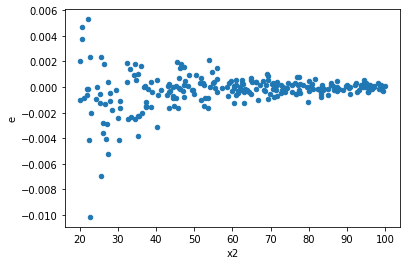

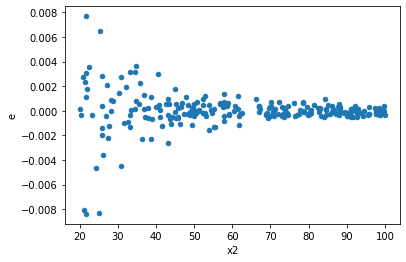

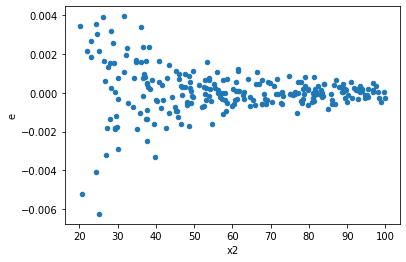

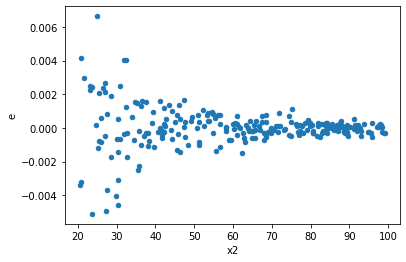

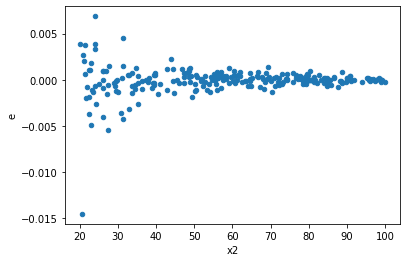

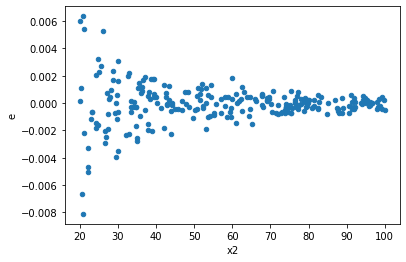

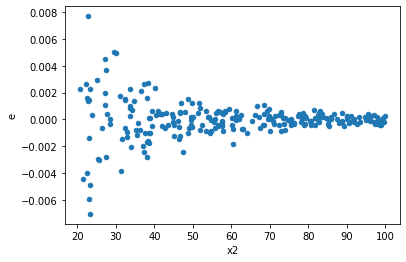

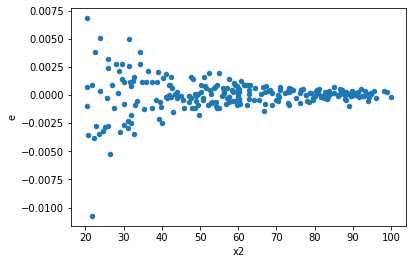

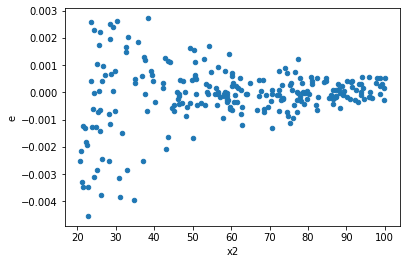

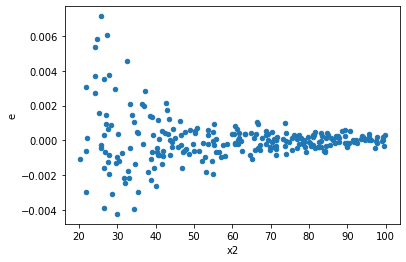

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,130.0,116.0,3.838777505279337e-05,0.00046825283917739023,2.952905773291798e-07,4.03666240670164e-06,13.670136186572954,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,105.0,141.0,2.7846297787133078e-05,0.000479259744531413,2.652028360679341e-07,3.3990052803646312e-06,12.816624930413434,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,138.0,108.0,0.00010655228771076943,0.00024942996611867303,7.721180268896336e-07,2.3095367233210467e-06,2.991170576116042,8.838429765845035e-09,0.9999999955807851,4.4192148829225175e-09,Reject005=0 : Heteroscedasticity
3.0,152.0,94.0,0.00022082624252012695,0.00022626298395637696,1.4528042271060984e-06,2.4070530208125206e-06,1.6568323356321935,0.008403284325035232,0.9957983578374824,0.004201642162517616,Reject005=0 : Heteroscedasticity
4.0,108.0,138.0,2.5560804258695828e-05,0.00045400157816358856,2.3667411350644286e-07,3.289866508431801e-06,13.900407018286952,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,134.0,112.0,0.0001271008709928386,0.0003931059718685678,9.485139626331238e-07,3.5098747488264983e-06,3.700393338525987,7.309930438736956e-12,0.999999999996345,3.654965219368478e-12,Reject005=0 : Heteroscedasticity
6.0,130.0,116.0,4.9025741344043424e-05,0.0003085389940812612,3.7712108726187247e-07,2.6598189144936306e-06,7.052957271112913,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,134.0,112.0,6.880579735653089e-05,0.00048325076129110433,5.134760996756037e-07,4.314738940099146e-06,8.402998587130048,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
9.0,115.0,131.0,2.702121556386909e-05,0.00026563962326549837,2.3496709185973122e-07,2.0277833837060946e-06,8.630073971876133,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,130.0,116.0,3.838777505279337e-05,0.00046825283917739023,2.952905773291798e-07,4.03666240670164e-06,13.670136186572954,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,105.0,141.0,2.7846297787133078e-05,0.000479259744531413,2.652028360679341e-07,3.3990052803646312e-06,12.816624930413434,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,138.0,108.0,0.00010655228771076943,0.00024942996611867303,7.721180268896336e-07,2.3095367233210467e-06,2.991170576116042,8.838429765845035e-09,Reject005=0 : Heteroscedasticity
3.0,152.0,94.0,0.00022082624252012695,0.00022626298395637696,1.4528042271060984e-06,2.4070530208125206e-06,1.6568323356321935,0.008403284325035232,Reject005=0 : Heteroscedasticity
4.0,108.0,138.0,2.5560804258695828e-05,0.00045400157816358856,2.3667411350644286e-07,3.289866508431801e-06,13.900407018286952,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,134.0,112.0,0.0001271008709928386,0.0003931059718685678,9.485139626331238e-07,3.5098747488264983e-06,3.700393338525987,7.309930438736956e-12,Reject005=0 : Heteroscedasticity
6.0,130.0,116.0,4.9025741344043424e-05,0.0003085389940812612,3.7712108726187247e-07,2.6598189144936306e-06,7.052957271112913,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,128.0,118.0,0.0002849241489438188,3.244775852875487e-05,2.2259699136235844e-06,2.749810044809735e-07,0.12353311821422637,2.2298338659808406e-27,Reject005=0 : Heteroscedasticity
8.0,134.0,112.0,6.880579735653089e-05,0.00048325076129110433,5.134760996756037e-07,4.314738940099146e-06,8.402998587130048,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64